# Mapping USA Covid-19 Cases

People were not impressed with [this map](https://www.reddit.com/r/assholedesign/comments/jigsq7/lets_play_are_3000_or_300000_of_my_neighbors/) ([made from these data](https://covid.cdc.gov/covid-data-tracker/index.html#county-map)). Let's improve it.

## Data Prep

First we, need to find the data. Clicking USAFacts.org link below the map takes me [here](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/). There's already a better map there but a) it's an unclassified choropleth and b) I want to make my own. 

Look, there's some links to download data:
- [Known Cases](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv)  ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_confirmed_usafacts_2020-10-27.csv) of data on 2020-10-27)
- [County Populations](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv) ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_county_population_usafacts_2020-10-27.csv) of data on 2020-10-27)

Now I need a shapefile to link the county data to. Download a shapefile from [US census website](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) - we'll use the most coarse resolution (1:20,000,000) to keep things simple. ([cache](https://github.com/jamesdamillington/usa-covid-mapping/tree/main/data/cb_2019_us_county_20m_2020-10-27) of file on 2020-10-27)

### County Data

In [1]:
import pandas as pd

In [2]:
cty_cases = pd.read_csv("data/covid_confirmed_usafacts_2020-10-27.csv")
cty_cases.head()

countyFIPS            County Name State  stateFIPS  1/22/20  1/23/20  \
0           0  Statewide Unallocated    AL          1        0        0   
1        1001         Autauga County    AL          1        0        0   
2        1003         Baldwin County    AL          1        0        0   
3        1005         Barbour County    AL          1        0        0   
4        1007            Bibb County    AL          1        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  \
0        0        0        0        0  ...         0         0         0   
1        0        0        0        0  ...      1966      1983      1989   
2        0        0        0        0  ...      6333      6350      6369   
3        0        0        0        0  ...       968       977       981   
4        0        0        0        0  ...       771       775       785   

   10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
0         0         0         0         0         0         0         0  
1      1999      2010      2021      2023      2030      2048      2059  
2      6375      6405      6443      6475      6615      6637      6658  
3       981       988       996       997      1012      1031      1033  
4       789       791       801       811       825       828       840  

[5 rows x 282 columns]

As indicated [here](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html):
> FIPS codes for smaller geographic entities are usually unique within larger geographic entities. For example, FIPS state codes are unique within nation and FIPS county codes are unique within state. Since counties nest within states, a full county FIPS code identifies both the state and the nesting county. For example, there are 49 counties in the 50 states ending in the digits “001”. To make these county FIPS codes unique, the state FIPS codes are added to the front of each county (01001, 02001, 04001, etc), where the first two digits refer to the state the county is in and the last three digits refer specifically to the county.

Note that every state gets one row for any data unallocated to a specific county: 

In [3]:
cty_cases.sort_values(by='countyFIPS').head()

countyFIPS            County Name State  stateFIPS  1/22/20  1/23/20  \
0              0  Statewide Unallocated    AL          1        0        0   
1338           0  Statewide Unallocated    MN         27        0        0   
1254           0  Statewide Unallocated    MI         26        0        0   
1239           0  Statewide Unallocated    MA         25        0        0   
1214           0  Statewide Unallocated    MD         24        0        0   

      1/24/20  1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  \
0           0        0        0        0  ...         0         0         0   
1338        0        0        0        0  ...       177       215       215   
1254        0        0        0        0  ...      6292      6305      6305   
1239        0        0        0        0  ...      1071      1086      1101   
1214        0        0        0        0  ...         0         0         0   

      10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
0            0         0         0         0         0         0         0  
1338       195       195       195       211       201       201       292  
1254      6741      6745      6765      6812      6942      7036      7036  
1239      1116      1129      1139      1139      1139      1157      1157  
1214         0         0         0         0         0         0         0  

[5 rows x 282 columns]

Let's drop this line for each state so that we have county-specific data only:

In [4]:
cty_cases = cty_cases[cty_cases['countyFIPS'] > 1000]
cty_cases.sort_values(by='countyFIPS').head()

countyFIPS     County Name State  stateFIPS  1/22/20  1/23/20  1/24/20  \
1        1001  Autauga County    AL          1        0        0        0   
2        1003  Baldwin County    AL          1        0        0        0   
3        1005  Barbour County    AL          1        0        0        0   
4        1007     Bibb County    AL          1        0        0        0   
5        1009   Blount County    AL          1        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  10/19/20  \
1        0        0        0  ...      1966      1983      1989      1999   
2        0        0        0  ...      6333      6350      6369      6375   
3        0        0        0  ...       968       977       981       981   
4        0        0        0  ...       771       775       785       789   
5        0        0        0  ...      1783      1807      1827      1838   

   10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
1      2010      2021      2023      2030      2048      2059  
2      6405      6443      6475      6615      6637      6658  
3       988       996       997      1012      1031      1033  
4       791       801       811       825       828       840  
5      1848      1873      1893      1911      1925      1932  

[5 rows x 282 columns]

The head of county tables above have 4-digit codes, but the metadata (quotes above) says they should be 5-digit. Maybe that's because we've lost the first 0 of the state ids? Look at the tail to check if they are 5-digit:

In [5]:
cty_cases.tail()

countyFIPS        County Name State  stateFIPS  1/22/20  1/23/20  \
3190       56037  Sweetwater County    WY         56        0        0   
3191       56039       Teton County    WY         56        0        0   
3192       56041       Uinta County    WY         56        0        0   
3193       56043    Washakie County    WY         56        0        0   
3194       56045      Weston County    WY         56        0        0   

      1/24/20  1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  \
3190        0        0        0        0  ...       410       411       415   
3191        0        0        0        0  ...       692       692       700   
3192        0        0        0        0  ...       392       401       401   
3193        0        0        0        0  ...       133       133       134   
3194        0        0        0        0  ...        81        88        93   

      10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
3190       422       428       436       443       451       456       462  
3191       711       715       715       727       740       743       747  
3192       403       404       407       410       425       428       431  
3193       135       139       142       143       144       145       145  
3194        99       101       103       115       121       127       127  

[5 rows x 282 columns]

Yep. We should force countyFIPS to 5-digits to be safe. Quick check what dtype the columns are:

In [6]:
cty_cases.dtypes

countyFIPS      int64
County Name    object
State          object
stateFIPS       int64
1/22/20         int64
                ...  
10/21/20        int64
10/22/20        int64
10/23/20        int64
10/24/20        int64
10/25/20        int64
Length: 282, dtype: object

We have integers, but these will become str after format:

In [7]:
cty_cases['countyFIPS'] = cty_cases['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [8]:
cty_cases.dtypes

countyFIPS     object
County Name    object
State          object
stateFIPS       int64
1/22/20         int64
                ...  
10/21/20        int64
10/22/20        int64
10/23/20        int64
10/24/20        int64
10/25/20        int64
Length: 282, dtype: object

In [9]:
cty_cases.head()

countyFIPS     County Name State  stateFIPS  1/22/20  1/23/20  1/24/20  \
1      01001  Autauga County    AL          1        0        0        0   
2      01003  Baldwin County    AL          1        0        0        0   
3      01005  Barbour County    AL          1        0        0        0   
4      01007     Bibb County    AL          1        0        0        0   
5      01009   Blount County    AL          1        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  10/19/20  \
1        0        0        0  ...      1966      1983      1989      1999   
2        0        0        0  ...      6333      6350      6369      6375   
3        0        0        0  ...       968       977       981       981   
4        0        0        0  ...       771       775       785       789   
5        0        0        0  ...      1783      1807      1827      1838   

   10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
1      2010      2021      2023      2030      2048      2059  
2      6405      6443      6475      6615      6637      6658  
3       988       996       997      1012      1031      1033  
4       791       801       811       825       828       840  
5      1848      1873      1893      1911      1925      1932  

[5 rows x 282 columns]

Repeat these steps for for population data:

In [10]:
cty_pops = pd.read_csv("data/covid_county_population_usafacts_2020-10-27.csv")
cty_pops.head()

countyFIPS            County Name State  population
0           0  Statewide Unallocated    AL           0
1        1001         Autauga County    AL       55869
2        1003         Baldwin County    AL      223234
3        1005         Barbour County    AL       24686
4        1007            Bibb County    AL       22394

In [11]:
cty_pops = cty_pops[cty_pops['countyFIPS'] > 1000]
cty_pops.sort_values(by='countyFIPS').head()

countyFIPS     County Name State  population
1        1001  Autauga County    AL       55869
2        1003  Baldwin County    AL      223234
3        1005  Barbour County    AL       24686
4        1007     Bibb County    AL       22394
5        1009   Blount County    AL       57826

In [12]:
cty_pops['countyFIPS'] = cty_pops['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))
cty_pops.sort_values(by='countyFIPS').head()

countyFIPS     County Name State  population
1      01001  Autauga County    AL       55869
2      01003  Baldwin County    AL      223234
3      01005  Barbour County    AL       24686
4      01007     Bibb County    AL       22394
5      01009   Blount County    AL       57826

[Join](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html#min-tut-08-combine) the County Cases and Count Populations DataFrames (checking one-to-one [merge](https://pandas.pydata.org/docs/user_guide/merging.html#merging)):

In [13]:
cty_dat = pd.merge(cty_cases,cty_pops, how='left', on='countyFIPS', validate="1:1")

In [14]:
cty_dat.head()

countyFIPS   County Name_x State_x  stateFIPS  1/22/20  1/23/20  1/24/20  \
0      01001  Autauga County      AL          1        0        0        0   
1      01003  Baldwin County      AL          1        0        0        0   
2      01005  Barbour County      AL          1        0        0        0   
3      01007     Bibb County      AL          1        0        0        0   
4      01009   Blount County      AL          1        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  10/19/20  10/20/20  10/21/20  10/22/20  \
0        0        0        0  ...      1999      2010      2021      2023   
1        0        0        0  ...      6375      6405      6443      6475   
2        0        0        0  ...       981       988       996       997   
3        0        0        0  ...       789       791       801       811   
4        0        0        0  ...      1838      1848      1873      1893   

   10/23/20  10/24/20  10/25/20   County Name_y  State_y  population  
0      2030      2048      2059  Autauga County       AL       55869  
1      6615      6637      6658  Baldwin County       AL      223234  
2      1012      1031      1033  Barbour County       AL       24686  
3       825       828       840     Bibb County       AL       22394  
4      1911      1925      1932   Blount County       AL       57826  

[5 rows x 285 columns]

### Spatial Data

Now work on the spatial data:

In [15]:
import geopandas as gpd

In [16]:
cty_shp = gpd.read_file("data/cb_2019_us_county_20m_2020-10-27/cb_2019_us_county_20m.shp")
cty_shp.sort_values(by="COUNTYFP").head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
1891      48      001  01383786  0500000US48001  48001  Anderson   06   
3055      24      001  01713506  0500000US24001  24001  Allegany   06   
996       06      001  01675839  0500000US06001  06001   Alameda   06   
367       12      001  00308548  0500000US12001  12001   Alachua   06   
2231      51      001  01480091  0500000US51001  51001  Accomack   06   

           ALAND      AWATER  \
1891  2752201306    39808595   
3055  1093462025    14801442   
996   1909614756   216907015   
367   2267634813   241567998   
2231  1163708393  2229277504   

                                               geometry  
1891  POLYGON ((-96.05279 32.00589, -95.42851 32.084...  
3055  POLYGON ((-79.06689 39.48062, -78.92842 39.723...  
996   POLYGON ((-122.33371 37.80980, -122.30393 37.8...  
367   POLYGON ((-82.65855 29.83014, -82.64063 29.828...  
2231  POLYGON ((-75.94118 37.56384, -75.89866 37.635...

We want to join the county data to the spatial data, but note from the head of `cty_shp` that there's no common column (e.g. countyFIPS) to merge on. Remember the countyFIPS number is a combination of the a state ID and a count ID. So if we combine `STATEFP` and `COUNTYFP` we can create a common (`countyFIPS`) column in `cty_shp`.

In [17]:
cty_shp['countyFIPS'] = cty_shp['STATEFP'] + cty_shp['COUNTYFP']
cty_shp['countyFIPS'] = cty_shp['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [18]:
cty_shp.sort_values(by='countyFIPS').head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD  \
679       01      001  00161526  0500000US01001  01001  Autauga   06   
1220      01      003  00161527  0500000US01003  01003  Baldwin   06   
2284      01      005  00161528  0500000US01005  01005  Barbour   06   
1978      01      007  00161529  0500000US01007  01007     Bibb   06   
109       01      009  00161530  0500000US01009  01009   Blount   06   

           ALAND      AWATER  \
679   1539602137    25706961   
1220  4117621645  1132980868   
2284  2292160139    50523213   
1978  1612167476     9602089   
109   1670103866    15015467   

                                               geometry countyFIPS  
679   POLYGON ((-86.91759 32.66417, -86.71339 32.661...      01001  
1220  POLYGON ((-88.02632 30.75336, -87.94455 30.827...      01003  
2284  POLYGON ((-85.73573 31.62449, -85.66565 31.786...      01005  
1978  POLYGON ((-87.42194 33.00338, -87.31854 33.006...      01007  
109   POLYGON ((-86.96336 33.85822, -86.92439 33.909...      01009

### Merge

Now we're ready to merge data with shapefile:

In [19]:
cty_all = pd.merge(cty_shp, cty_dat,  how='left', on='countyFIPS')

Let's work with conterminous states only (state codes [here](https://www.census.gov/library/reference/code-lists/ansi.html#par_textimage_3))

In [20]:
cty_cont = cty_all.dropna()
cty_cont = cty_cont[cty_cont['State_y'] != 'AK']
cty_cont = cty_cont[cty_cont['State_y'] != 'HI']

In [21]:
cty_cont.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      29      227  00758566  0500000US29227  29227       Worth   06   
1      31      061  00835852  0500000US31061  31061    Franklin   06   
2      36      013  00974105  0500000US36013  36013  Chautauqua   06   
3      37      181  01008591  0500000US37181  37181       Vance   06   
4      47      183  01639799  0500000US47183  47183     Weakley   06   

        ALAND      AWATER                                           geometry  \
0   690564983      493903  POLYGON ((-94.63203 40.57176, -94.53388 40.570...   
1  1491355860      487899  POLYGON ((-99.17940 40.35068, -98.72683 40.350...   
2  2746047476  1139407865  POLYGON ((-79.76195 42.26986, -79.62748 42.324...   
3   653713542    42178610  POLYGON ((-78.49773 36.51467, -78.45728 36.541...   
4  1503107848     3707114  POLYGON ((-88.94916 36.41010, -88.81642 36.410...   

   ... 10/19/20 10/20/20 10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  \
0  ...     26.0     27.0     29.0      29.0      31.0      31.0      34.0   
1  ...     75.0     80.0     80.0      85.0      89.0      89.0      89.0   
2  ...    799.0    805.0    845.0     858.0     868.0     877.0     884.0   
3  ...   1147.0   1150.0   1158.0    1170.0    1177.0    1177.0    1179.0   
4  ...   1434.0   1444.0   1453.0    1467.0    1511.0    1523.0    1561.0   

       County Name_y  State_y  population  
0       Worth County       MO      2013.0  
1    Franklin County       NE      2979.0  
2  Chautauqua County       NY    126903.0  
3       Vance County       NC     44535.0  
4     Weakley County       TN     33328.0  

[5 rows x 295 columns]

<AxesSubplot:>

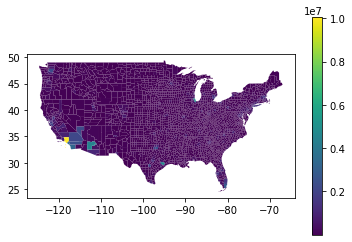

In [22]:
cty_cont.plot('population', legend=True)

### Subset and Calc Rates

We can only map one date at a time and we shouldn't map absolute values. So:
- select a single date
- calculate as a proportion

In [23]:
cty_cont['case_rate_1025'] = cty_cont['10/25/20'] / cty_cont['population']

<AxesSubplot:>

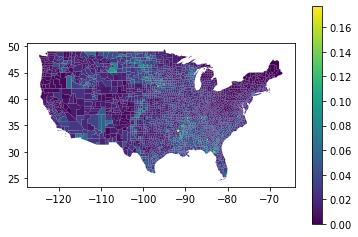

In [24]:
cty_cont.plot('case_rate_1025', legend=True)

Multiply to get cases per 100,000 people

In [25]:
cty_cont['case_rate_100k_1025'] = cty_cont['case_rate_1025'] * 100000

<AxesSubplot:>

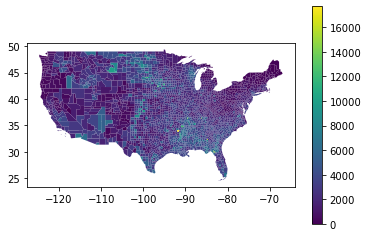

In [26]:
cty_cont.plot('case_rate_100k_1025', legend=True)

Let's select only the columns we need from here on, and rename some:

In [27]:
cty_cont_1025 = cty_cont[['NAME','geometry', 'countyFIPS', 'State_y', 'population', '10/25/20']]

In [28]:
cty_cont_1025.head()

NAME                                           geometry countyFIPS  \
0       Worth  POLYGON ((-94.63203 40.57176, -94.53388 40.570...      29227   
1    Franklin  POLYGON ((-99.17940 40.35068, -98.72683 40.350...      31061   
2  Chautauqua  POLYGON ((-79.76195 42.26986, -79.62748 42.324...      36013   
3       Vance  POLYGON ((-78.49773 36.51467, -78.45728 36.541...      37181   
4     Weakley  POLYGON ((-88.94916 36.41010, -88.81642 36.410...      47183   

  State_y  population  10/25/20  
0      MO      2013.0      34.0  
1      NE      2979.0      89.0  
2      NY    126903.0     884.0  
3      NC     44535.0    1179.0  
4      TN     33328.0    1561.0

In [29]:
cty_cont_1025_rn = cty_cont_1025.rename(columns = {'NAME': 'countyName',
                               'State_y': 'stateName',
                               '10/25/20': '2020-10-25'})  #dont' do inplace to avoid SettingWithCopyWarning

cty_cont_1025_rn['case_rate_100k'] = 100000 * cty_cont_1025_rn['2020-10-25'] / cty_cont_1025_rn['population']

cty_cont_1025_rn.head()

countyName                                           geometry countyFIPS  \
0       Worth  POLYGON ((-94.63203 40.57176, -94.53388 40.570...      29227   
1    Franklin  POLYGON ((-99.17940 40.35068, -98.72683 40.350...      31061   
2  Chautauqua  POLYGON ((-79.76195 42.26986, -79.62748 42.324...      36013   
3       Vance  POLYGON ((-78.49773 36.51467, -78.45728 36.541...      37181   
4     Weakley  POLYGON ((-88.94916 36.41010, -88.81642 36.410...      47183   

  stateName  population  2020-10-25  case_rate_100k  
0        MO      2013.0        34.0     1689.021361  
1        NE      2979.0        89.0     2987.579725  
2        NY    126903.0       884.0      696.595037  
3        NC     44535.0      1179.0     2647.356012  
4        TN     33328.0      1561.0     4683.749400

In [30]:
#optionally dave this data frame
#cty_cont_1025_rn.to_csv('data/covid_usacont_2020-10-25.csv',index=False)

In [31]:
cty_cont = cty_cont_1025_rn  #make a simpler object name for the remainder of the notebook

#if data is saved to file and later re-read code would be needed
'''
cty_cont = pd.read_csv('data/covid_usacont_2020-10-25.csv')
cty_cont.head()

import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

cty_cont = gpd.GeoDataFrame(cty_cont)  #geopandas
cty_cont['geometry'] = cty_cont['geometry'].apply(lambda x: loads(x))  #from shapely
cty_cont = cty_cont.set_geometry('geometry')
'''


"\ncty_cont = pd.read_csv('data/covid_usacont_2020-10-25.csv')\ncty_cont.head()\n\nimport shapely                 #needed to set geopandas geometry \nfrom shapely.wkt import loads  #needed to set geopandas geometry\n\ncty_cont = gpd.GeoDataFrame(cty_cont)  #geopandas\ncty_cont['geometry'] = cty_cont['geometry'].apply(lambda x: loads(x))  #from shapely\ncty_cont = cty_cont.set_geometry('geometry')\n"

## Choropleths

We _could_ create a map plotting case rates without classification:

In [32]:
import matplotlib.pyplot as plt

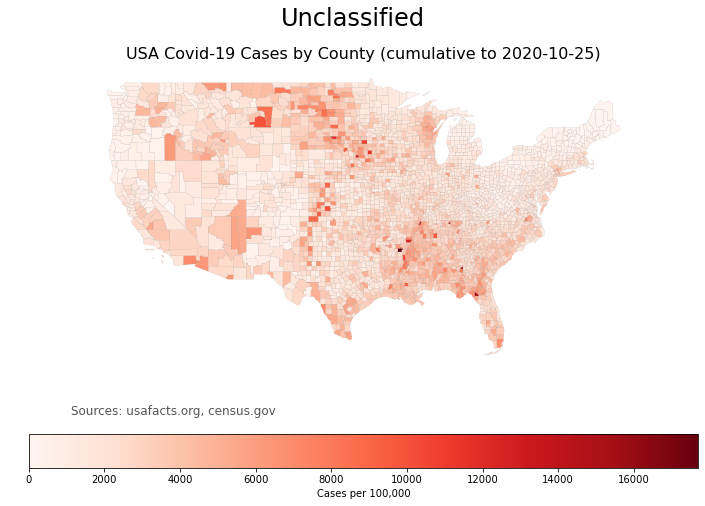

In [33]:
#code to plot map unclassified

fig, ax1 = plt.subplots(1, figsize=(12, 8))
cty_cont.plot(column='case_rate_100k', cmap="Reds", edgecolor='grey', linewidth=0.1,
              ax=ax1, legend=True, legend_kwds={'label': "Cases per 100,000", 'orientation': "horizontal"})

ax1.axis('off') #don't plot the axes (bounding box)

plt.suptitle("Unclassified", fontsize=24)
plt.title("USA Covid-19 Cases by County (cumulative to 2020-10-25)", fontsize=16)

ax1.annotate('Sources: usafacts.org, census.gov',
             xy=(0.1, 0.2), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')  #add source info on the image itself

#optional save
#plt.savefig("img/map_unclassified.png", dpi=200, bbox_inches='tight', facecolor='white') #save file to img folder

plt.show()

But, better is to classify values in some way.

From [Rey _et al._ (2020)](https://geographicdata.science/book/notebooks/05_choropleth.html)
> Different classification schemes obtain from their definition of the class boundaries. The choice of the classification scheme should take into consideration the statistical distribution of the attribute values.

So let's look at the distribution with a nice histogram (using matplotlib):

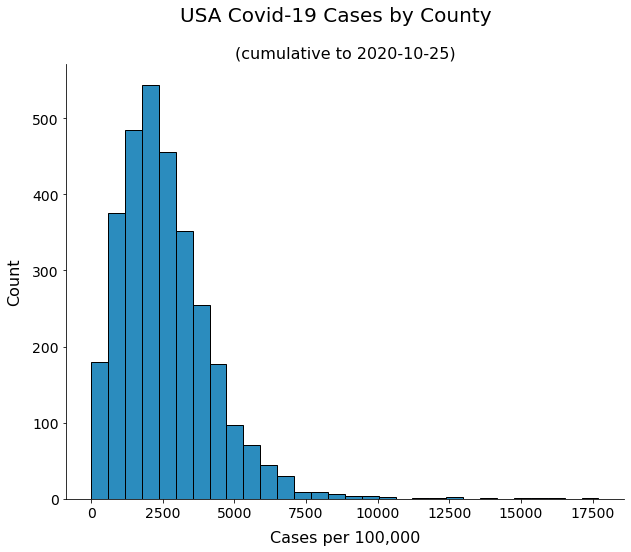

In [34]:
cty_cont = cty_cont_1025_rn  #if not read back in from file

nbins = 30

fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont['case_rate_100k'].hist(
    color='#2b8cbe',
    edgecolor='black',
    grid=False,
    bins=nbins,
    ax=ax)

plt.tick_params(labelsize=14)  
plt.xlabel("Cases per 100,000",labelpad=10, fontsize=16)
plt.ylabel("Count",labelpad=10, fontsize=16)   
plt.suptitle("USA Covid-19 Cases by County", fontsize=20)
plt.title("(cumulative to 2020-10-25)", fontsize=16)

ax.spines['right'].set_visible(False)     
ax.spines['top'].set_visible(False)

#optional save
#plt.savefig("img/hist_rawdata_30bins.png", dpi=300, bbox_inches='tight', facecolor='white') #save file to img folder

plt.show()

To create a map with classification we need [the `mapclassify` package](https://pypi.org/project/mapclassify/). The [`palettable` package](https://pypi.org/project/palettable/) is useful for using good colour palettes. 

In [35]:
import mapclassify  #for choropleth classification
import palettable.colorbrewer.sequential as pcs  #for colorbrewer palettes

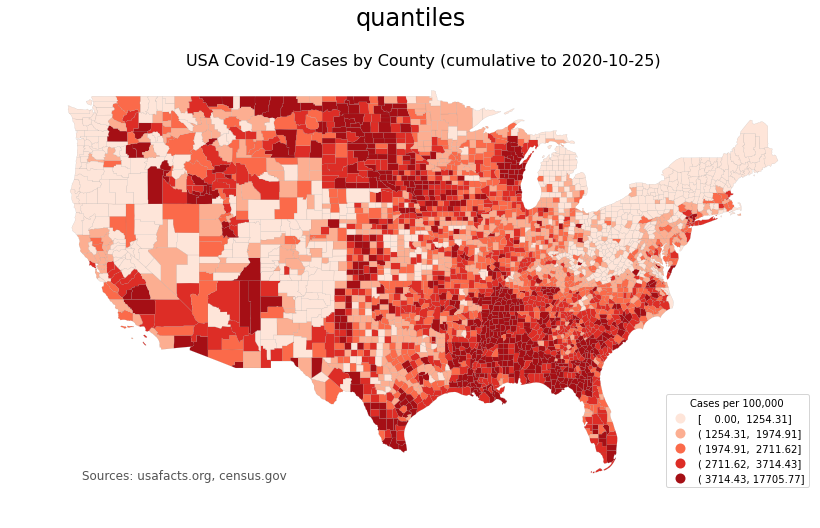

In [36]:
#code to plot single classifier map

def plot_choro(schemename, classbins, pal):

    fig, ax1 = plt.subplots(1, figsize=(14, 8))
    cty_cont.plot(column='case_rate_100k', scheme=schemename, k=classbins, 
                  cmap=pal.mpl_colormap, edgecolor='grey', linewidth=0.1,
                  ax=ax1, legend=True, legend_kwds={'title': "Cases per 100,000",'loc': 'lower right'})

    ax1.axis('off') #don't plot the axes (bounding box)

    plt.suptitle(schemename, fontsize=24)
    plt.title("USA Covid-19 Cases by County (cumulative to 2020-10-25)", fontsize=16)

    ax1.annotate('Sources: usafacts.org, census.gov',
                 xy=(0.1, 0.11), xycoords='figure fraction', 
                 horizontalalignment='left', verticalalignment='top', 
                 fontsize=12, color='#555555')  #add source info on the image itself

    #optional save
    #plt.savefig("img/map_classified.png", dpi=200, bbox_inches='tight', facecolor='white') #save file to img folder

    plt.show()
    

plot_choro(schemename='quantiles', classbins=5, pal=pcs.Reds_5)


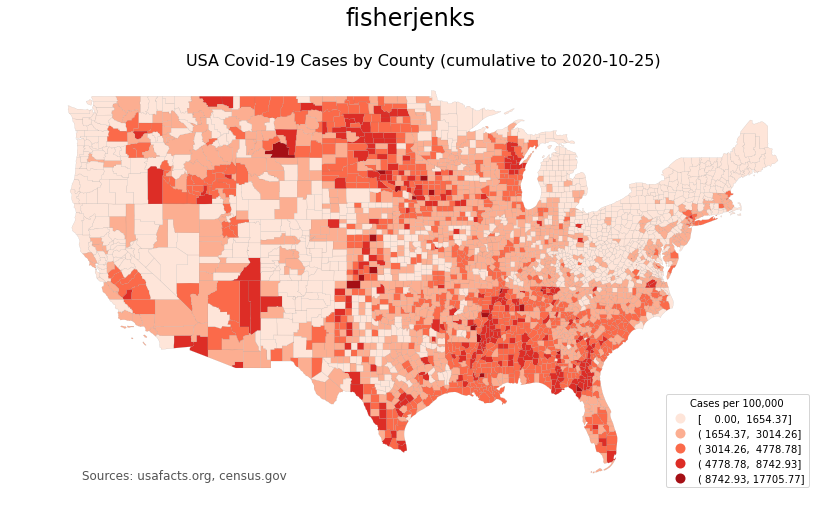

In [37]:
plot_choro(schemename='fisherjenks', classbins=5, pal=pcs.Reds_5)

## Folium

Now let's try making an interactive map using the [Folium](https://python-visualization.github.io/folium/) package.

In [38]:
import folium

cty_cont.crs = "EPSG:4326"   #set CRS for mapping

In [39]:
#resources
#https://python-visualization.github.io/folium/quickstart.html
#https://stackoverflow.com/a/50228588
#https://stackoverflow.com/q/55196978
#https://leafletjs.com/reference-1.6.0.html#path-option
#https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
#https://gis.stackexchange.com/questions/362283/valueerror-cannot-transform-naive-geometries
#https://towardsdatascience.com/using-folium-to-generate-choropleth-map-with-customised-tooltips-12e4cec42af2

def folium_choro(classbins):

    m = folium.Map(
        location=[40, -100],
        zoom_start=4
    )

    covid = folium.Choropleth(
        cty_cont,
        data=cty_cont,
        key_on='feature.properties.countyFIPS',    #see happens if you use countyName to key on... 
        columns=['countyFIPS', 'case_rate_100k'],  
        fill_color='Reds',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Covid-19 Cases per 100k',
        name="Choropleth",
        bins=classbins,

    ).add_to(m)

    #tooltips
    def style(feature):
        return{'stroke': False, 'fillOpacity': 0}  #set tooltip later transparent

    folium.GeoJson(
        cty_cont,
        name='Tooltips',
        tooltip=folium.features.GeoJsonTooltip(fields=['countyName', 'case_rate_100k', 'population'],
                                               aliases=['County Name', 'Case Rate', 'Popn'],
                                              localize=True),
                                              style_function = style
    ).add_to(m)

    folium.LayerControl().add_to(m)  

    display(m)  #display needed within function

In [40]:
quantiles5 = list(cty_cont['case_rate_100k'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))  #classification bins
quantiles5

[0.0,
 1254.3095562346866,
 1974.9108084824272,
 2711.6245667585044,
 3714.4307939674154,
 17705.773955773955]

In [41]:
folium_choro(classbins=quantiles5)

## Task

Work out how you can use the `mapclassify` to create bins for a FisherJenks classification on the folium map